In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/measures_v2.csv')
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [3]:
df['red'] = (1/2)**((df['stator_winding'] - 130)/10)
df['red'].loc[df['red'] > 1] = 1

C:\Users\User\AppData\Local\Temp\ipykernel_8848\3359279396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['red'].loc[df['red'] > 1] = 1


In [9]:
window = 7200   # 1h
df['rul'] = 50000
for i in range(df.index.size):
    if i % window == 0 and i != 0:
        avg_red = df['red'].iloc[i-window:i].mean()
        df['rul'].iloc[i-window:i] = df['rul'].iloc[i-window-1] * avg_red - 1.39e-3*window

n = df.index.size % window
df['rul'].iloc[-n:] = df['rul'].iloc[-n-1] * df['red'].iloc[-n:].mean() - 1.39e-3*window

C:\Users\User\AppData\Local\Temp\ipykernel_17352\366584397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rul'].iloc[i-window:i] = df['rul'].iloc[i-window-1] * avg_red - 1.39e-3*window


<AxesSubplot:>

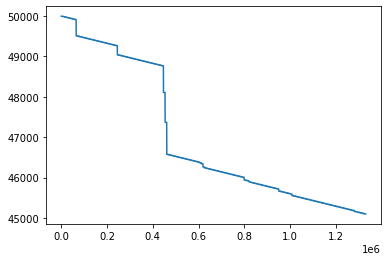

In [10]:
df.rul.plot()

In [13]:
# df[['profile_id','red','rul']].to_csv('test.csv')

In [15]:
# df.to_csv('measures_rul.csv')